In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

!pip install pydmd
import pydmd

from pydmd import DMD

!pip install scipy
import scipy

!pip install future
import future
!pip install sphinx
import sphinx

from sklearn.decomposition import PCA

import pandas as pd

from sklearn.preprocessing import StandardScaler
from pydmd import DMDc
from numpy.testing import assert_array_almost_equal

import time
from pydmd import CDMD

import timeit
import psutil

!pip install ipython-autotime
%load_ext autotime

!pip install memory_profiler
from memory_profiler import memory_usage

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.0 MB/s eta 0:00:00
time: 3.63 s (started: 2023-09-27 22:28:51 +00:00)


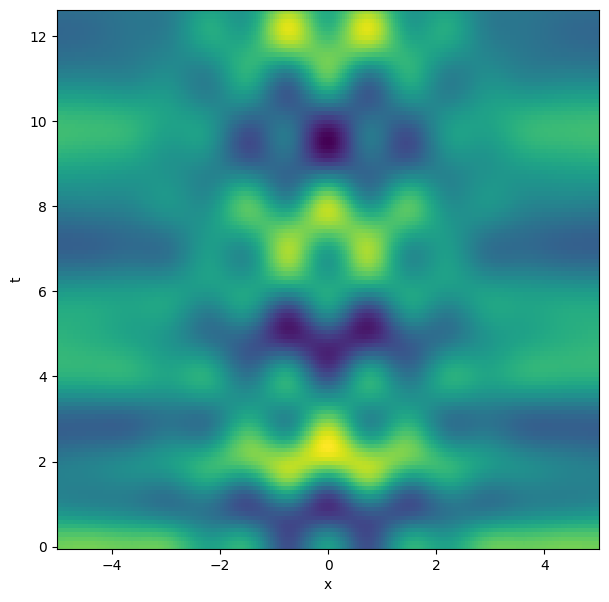

time: 535 ms (started: 2023-09-27 22:33:26 +00:00)


In [ ]:
def create_dataset(x_dim, t_dim):
    def f1(x, t):
        return np.exp(-(x**2) * 0.2) * np.cos(4 * x) * np.exp(2.3j * t)

    def f2(x, t):
        return (1 - np.exp(1 - x**2 / 6)) * np.exp(1.3j * t)

    def f3(x, t):
        return (-0.02 * x**2 + 1) * (1.1j ** (-2 * t))

    x = np.linspace(-5, 5, x_dim)
    t = np.linspace(0, 4 * np.pi, t_dim)

    xgrid, tgrid = np.meshgrid(x, t)

    X1 = f1(xgrid, tgrid)
    X2 = f2(xgrid, tgrid)
    X3 = f3(xgrid, tgrid)
    return xgrid, tgrid, (X1 + X2 + X3)

xgrid, tgrid, X = create_dataset(256, 128)
plt.figure(figsize=(7, 7))
plt.pcolor(xgrid, tgrid, X.real)
plt.xlabel("x")
plt.ylabel("t")
plt.show()

In [ ]:
Xr = X.real
Xi = X.imag
Xr.shape

(128, 256)

time: 3.16 ms (started: 2023-09-27 22:33:28 +00:00)


In [ ]:
pca_r = PCA(n_components=3)
pca_i = PCA(n_components=3)

#PC = pca.fit_transform(X.real)
#eVecs = pca.components_

time: 374 µs (started: 2023-09-27 22:33:30 +00:00)


In [ ]:
PCr = pca_r.fit_transform(Xr)
PCi = pca_i.fit_transform(Xi)
pci = pd.DataFrame(PCi)
pcr = pd.DataFrame(PCr)
pcf = pcr.T.append(pci.T)
PCf = np.array(pcf)

time: 50.3 ms (started: 2023-09-27 22:33:31 +00:00)


<ipython-input-5-1ba75a9ba7d7>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pcf = pcr.T.append(pci.T)


In [ ]:
PCf.shape

(6, 128)

time: 2.77 ms (started: 2023-09-27 22:33:32 +00:00)


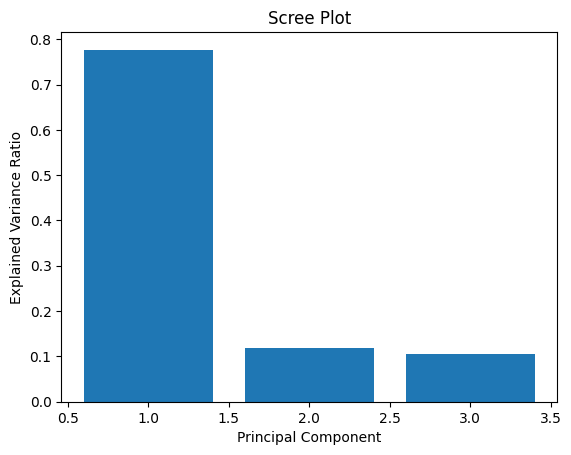

PC	Explained Variance Ratio	Cumulative Explained Variance Ratio
1.0	0.7767735148869962	0.7767735148869962
2.0	0.11820108421828174	0.894974599105278
3.0	0.10502540089472215	1.0000000000000002
time: 183 ms (started: 2023-09-27 22:33:33 +00:00)


In [ ]:
eigenvalues_r = pca_r.explained_variance_
explained_variance_ratio_r = pca_r.explained_variance_ratio_

# Scree plot
num_components = len(explained_variance_ratio_r)
plt.bar(range(1, num_components + 1), explained_variance_ratio_r)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# Summary table
cumulative_explained_variance_ratio_r = np.cumsum(explained_variance_ratio_r)
summary_table = np.column_stack((range(1, num_components + 1), explained_variance_ratio_r, cumulative_explained_variance_ratio_r))
print('PC\tExplained Variance Ratio\tCumulative Explained Variance Ratio')
for row in summary_table:
    print('\t'.join(str(x) for x in row))

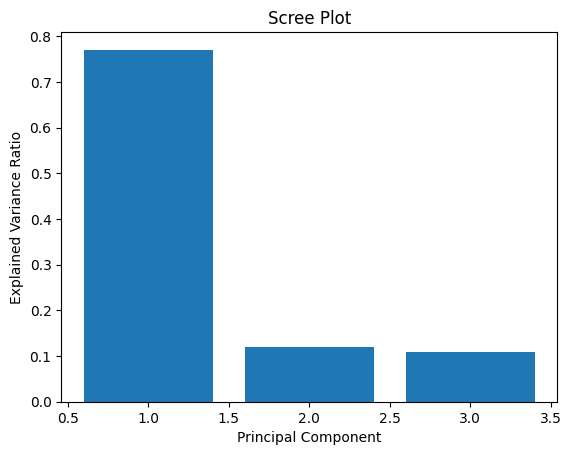

PC	Explained Variance Ratio	Cumulative Explained Variance Ratio
1.0	0.7707216146764806	0.7707216146764806
2.0	0.11962253556285701	0.8903441502393377
3.0	0.10965584976066234	1.0
time: 387 ms (started: 2023-07-17 13:59:03 +00:00)


In [ ]:
eigenvalues_i = pca_i.explained_variance_
explained_variance_ratio_i = pca_i.explained_variance_ratio_

# Scree plot
num_components = len(explained_variance_ratio_i)
plt.bar(range(1, num_components + 1), explained_variance_ratio_i)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# Summary table
cumulative_explained_variance_ratio_i = np.cumsum(explained_variance_ratio_i)
summary_table = np.column_stack((range(1, num_components + 1), explained_variance_ratio_i, cumulative_explained_variance_ratio_i))
print('PC\tExplained Variance Ratio\tCumulative Explained Variance Ratio')
for row in summary_table:
    print('\t'.join(str(x) for x in row))

/usr/local/lib/python3.10/dist-packages/pydmd/snapshots.py:72: UserWarning: Input data condition number 8.025902529947144e+17. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


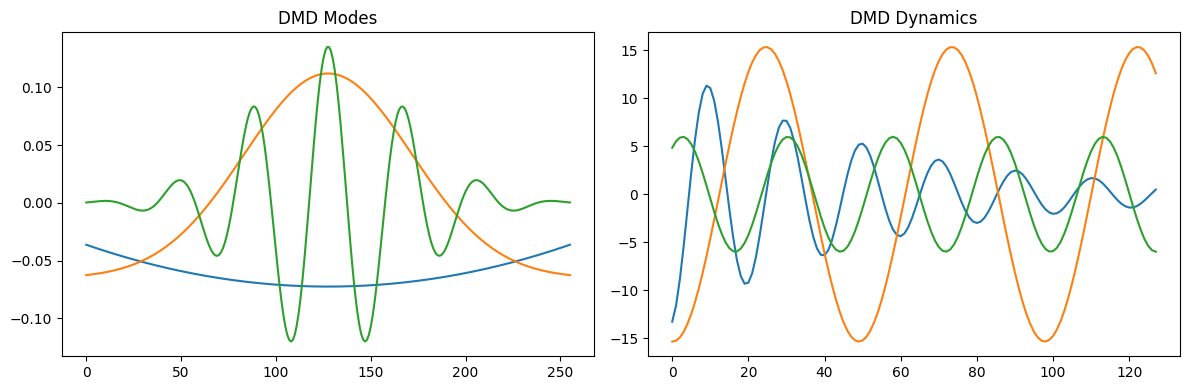

time: 576 ms (started: 2023-09-27 22:33:38 +00:00)


In [ ]:

Z = X.T

# Perform DMD
dmdo = DMD(svd_rank=3)
dmdo.fit(Z)

# Access DMD modes and dynamics
omodes = dmdo.modes.T
odynamics = dmdo.dynamics

# Visualize DMD modes and dynamics
plt.figure(figsize=(12, 4))

# Plot DMD modes
plt.subplot(1, 2, 1)
for mode in omodes:
    plt.plot(mode)
plt.title('DMD Modes')

# Plot DMD dynamics
plt.subplot(1, 2, 2)
for dynamic in odynamics:
    plt.plot(dynamic)
plt.title('DMD Dynamics')

plt.tight_layout()
plt.show()

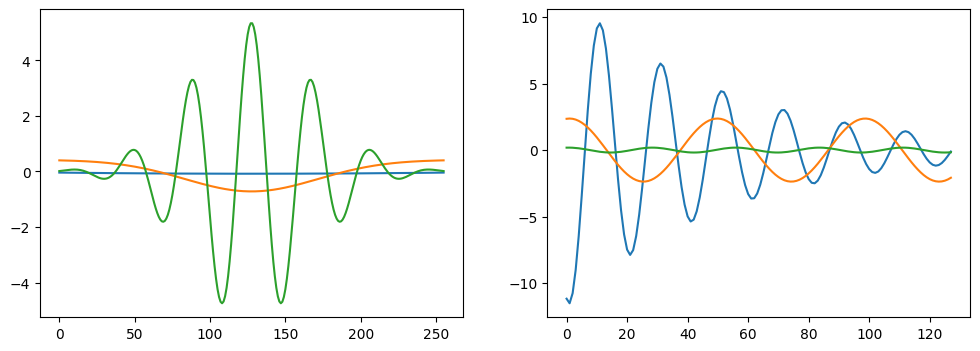

time: 509 ms (started: 2023-09-27 22:33:44 +00:00)


In [ ]:
snapshots_matrix_2 = X.T
random_matrix = np.random.permutation(
    snapshots_matrix_2.shape[0] * snapshots_matrix_2.shape[1]
)
random_matrix = random_matrix.reshape(
    snapshots_matrix_2.shape[1], snapshots_matrix_2.shape[0]
)

compression_matrix_2 = random_matrix / np.linalg.norm(random_matrix)

cdmd_2 = CDMD(svd_rank=3, compression_matrix=compression_matrix_2)
cdmd_2.fit(snapshots_matrix_2)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(cdmd_2.modes.real)
plt.subplot(1, 2, 2)
plt.plot(cdmd_2.dynamics.T.real)
plt.show()

In [ ]:
compression_matrix_2.shape

(128, 256)

time: 7.76 ms (started: 2023-08-31 15:27:50 +00:00)


In [ ]:
X.shape

(128, 256)

time: 11.7 ms (started: 2023-08-31 15:27:56 +00:00)


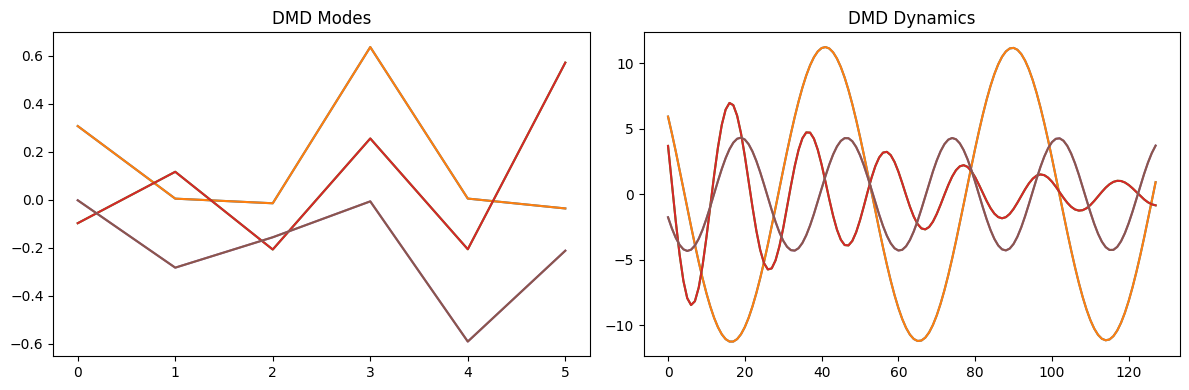

time: 357 ms (started: 2023-09-27 22:34:01 +00:00)


In [ ]:

Z = PCf

# Perform DMD
pdmd = DMD(svd_rank=6)
pdmd.fit(Z)

# Access DMD modes and dynamics
pmodes = pdmd.modes.T
pdynamics = pdmd.dynamics

# Visualize DMD modes and dynamics
plt.figure(figsize=(12, 4))

# Plot DMD modes
plt.subplot(1, 2, 1)
for mode in pmodes:
    plt.plot(mode)
plt.title('DMD Modes')

# Plot DMD dynamics
plt.subplot(1, 2, 2)
for dynamic in pdynamics:
    plt.plot(dynamic)
plt.title('DMD Dynamics')

plt.tight_layout()
plt.show()

In [ ]:
snapshots_matrix = PCf
random_matrix = np.random.permutation(
    snapshots_matrix.shape[0] * snapshots_matrix.shape[1]
)
random_matrix = random_matrix.reshape(
    snapshots_matrix.shape[1], snapshots_matrix.shape[0]
)

compression_matrix = random_matrix / np.linalg.norm(random_matrix)

time: 2.16 ms (started: 2023-07-19 16:05:09 +00:00)


In [ ]:
print(PCf.shape)
print(snapshots_matrix.shape)
print(compression_matrix.shape)

(6, 128)
(6, 128)
(128, 6)
time: 7.32 ms (started: 2023-07-18 12:28:44 +00:00)


In [ ]:
cdmd = CDMD(svd_rank=6, compression_matrix=compression_matrix)
cdmd.fit(snapshots_matrix)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(cdmd.modes.real)
plt.subplot(1, 2, 2)
plt.plot(cdmd.dynamics.T.real)
plt.show()

Text(0.5, 1.0, 'DMD Dynamics')

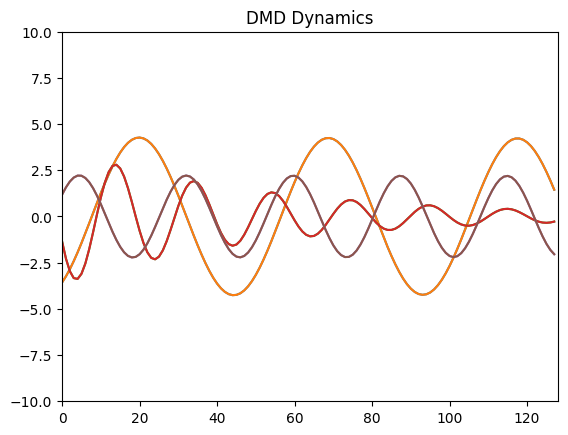

time: 521 ms (started: 2023-07-17 16:11:20 +00:00)


In [ ]:
for dynamic in cdmd.dynamics:
    plt.plot(dynamic)
plt.xlim(0, 128)
plt.ylim(-10, 10)
plt.title('DMD Dynamics')

Eigenvalue (0.9916256337304362+0.12832448660949947j): distance from unit circle 0.00010571992091046312
Eigenvalue (0.9916256337304362-0.12832448660949947j): distance from unit circle 0.00010571992091046312
Eigenvalue (0.934249939415244+0.3000910161101718j): distance from unit circle 0.01873674926275637
Eigenvalue (0.934249939415244-0.3000910161101718j): distance from unit circle 0.01873674926275637
Eigenvalue (0.9740955049299136+0.2256550034783258j): distance from unit circle 0.00010888926870322724
Eigenvalue (0.9740955049299136-0.2256550034783258j): distance from unit circle 0.00010888926870322724


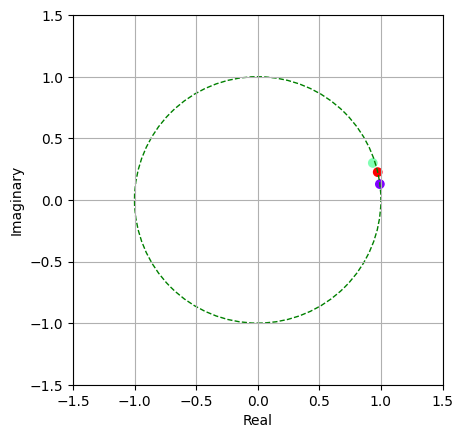

time: 2.29 s (started: 2023-07-17 16:15:11 +00:00)


In [ ]:
eigenvalues = cdmd.eigs

for eig in eigenvalues:
    print("Eigenvalue {}: distance from unit circle {}".format(eig, np.abs(np.sqrt(eig.imag**2 + eig.real**2) - 1)))
fig, ax = plt.subplots()
filtered_eigenvalues = [eig for eig in eigenvalues if eig.imag > 0]
colors = np.linspace(0, 1, len(filtered_eigenvalues))
edge_colors = plt.cm.rainbow(colors)
ax.scatter(np.real(filtered_eigenvalues), np.imag(filtered_eigenvalues), c=colors, cmap='rainbow', marker='o', edgecolors=edge_colors, facecolors='none')
unit_circle = plt.Circle((0, 0), 1, color='green', fill=False, linestyle='dashed')
ax.add_artist(unit_circle)
ax.set_aspect('equal', adjustable='box')
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
plt.xlabel('Real')
plt.ylabel('Imaginary')
#plt.title('Eigenvalues on the Unit Circle (Positive Imaginary Part)')
plt.grid(True)
plt.show()

In [ ]:
omega = np.log(dmdo.eigs)
omega2 = np.log(pdmd.eigs)
omega3 = np.log(cdmd_2.eigs)

time: 898 µs (started: 2023-08-24 13:37:26 +00:00)


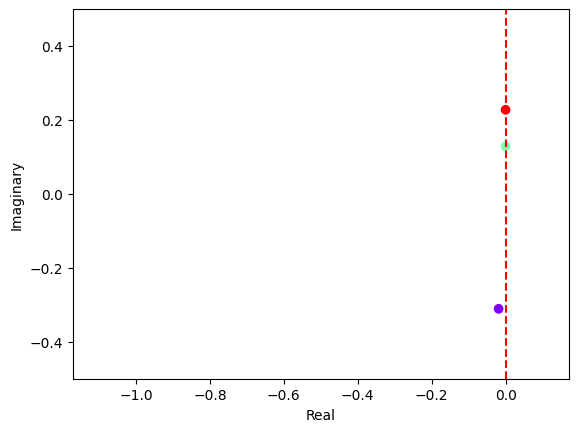

time: 184 ms (started: 2023-08-24 13:34:54 +00:00)


In [ ]:
fig, ax = plt.subplots()
colors = np.linspace(0, 1, len(omega))
edge_colors = plt.cm.rainbow(colors)
ax.scatter(np.real(omega), np.imag(omega), c=colors, cmap='rainbow', marker='o', edgecolors=edge_colors, facecolors='none')
#unit_circle = plt.Circle((0, 0), 1, color='green', fill=False, linestyle='dashed')
#ax.add_artist(unit_circle)
ax.set_aspect('equal', adjustable='datalim')
ax.axvline(x=0, color='red', linestyle='dashed')
ax.set_xlim([-1.5, 0.5])
ax.set_ylim([-0.5, 0.5])
plt.xlabel('Real')
plt.ylabel('Imaginary')
#plt.grid(True)
#plt.title('Eigenvalues on the Unit Circle (Positive Imaginary Part)')
plt.show()

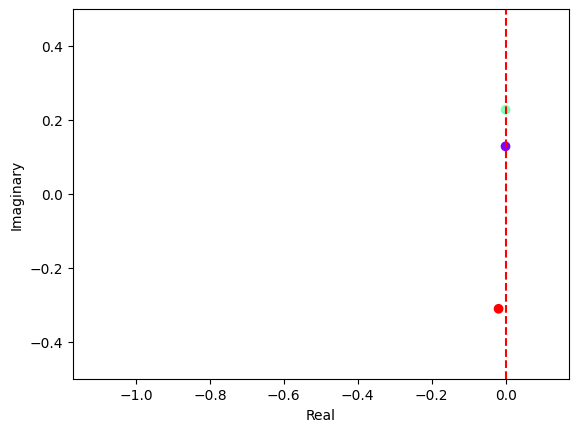

time: 234 ms (started: 2023-08-24 13:52:24 +00:00)


In [ ]:
eigenvalues = [omega2[0], omega2[4], omega2[3]]

#filtered_eigenvalues = [eig for eig in omega2 if eig not in eigenvalues_to_remove]
filtered_eigenvalues = [eig for eig in eigenvalues]

fig, ax = plt.subplots()
colors = np.linspace(0, 1, len(filtered_eigenvalues))
edge_colors = plt.cm.rainbow(colors)
ax.scatter(np.real(filtered_eigenvalues), np.imag(filtered_eigenvalues), c=colors, cmap='rainbow', marker='o', edgecolors=edge_colors, facecolors='none')
#unit_circle = plt.Circle((0, 0), 1, color='green', fill=False, linestyle='dashed')
#ax.add_artist(unit_circle)
ax.set_aspect('equal', adjustable='datalim')
ax.axvline(x=0, color='red', linestyle='dashed')
ax.set_xlim([-1.5, 0.5])
ax.set_ylim([-0.5, 0.5])
plt.xlabel('Real')
plt.ylabel('Imaginary')
#plt.grid(True)
#plt.title('Eigenvalues on the Unit Circle (Positive Imaginary Part)')
plt.show()

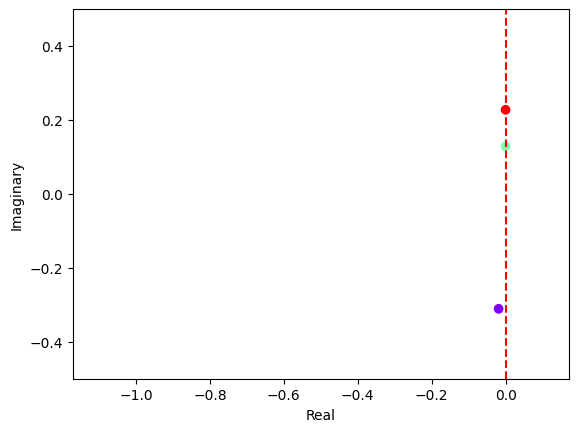

time: 296 ms (started: 2023-08-24 13:37:54 +00:00)


In [ ]:
fig, ax = plt.subplots()
colors = np.linspace(0, 1, len(omega3))
edge_colors = plt.cm.rainbow(colors)
ax.scatter(np.real(omega3), np.imag(omega3), c=colors, cmap='rainbow', marker='o', edgecolors=edge_colors, facecolors='none')
#unit_circle = plt.Circle((0, 0), 1, color='green', fill=False, linestyle='dashed')
#ax.add_artist(unit_circle)
ax.set_aspect('equal', adjustable='datalim')
ax.axvline(x=0, color='red', linestyle='dashed')
ax.set_xlim([-1.5, 0.5])
ax.set_ylim([-0.5, 0.5])
plt.xlabel('Real')
plt.ylabel('Imaginary')
#plt.grid(True)
#plt.title('Eigenvalues on the Unit Circle (Positive Imaginary Part)')
plt.show()

In [ ]:
external_variable_1 = PCf

# Code block to measure execution time and RAM requirements
code_block = """
# Access the external variables or dependencies here
print(external_variable_1)

Z = PCf

# Perform DMD
pdmd = DMD(svd_rank=6)
pdmd.fit(Z)

# Access DMD modes and dynamics
pmodes = pdmd.modes.T
pdynamics = pdmd.dynamics

# Visualize DMD modes and dynamics
plt.figure(figsize=(12, 4))

# Plot DMD modes
plt.subplot(1, 2, 1)
for mode in pmodes:
    plt.plot(mode)
plt.title('DMD Modes')

# Plot DMD dynamics
plt.subplot(1, 2, 2)
for dynamic in pdynamics:
    plt.plot(dynamic)
plt.title('DMD Dynamics')

plt.tight_layout()
plt.show()
"""

execution_times = []
memory_usage = []

# Execute the code block 10 times and measure the execution time and RAM requirements
for _ in range(100):
    process = psutil.Process()
    process_memory_before = process.memory_info().rss

    # Create a setup statement to define the local namespace with the external variables
    setup_statement = f"from __main__ import external_variable_1"

    # Measure the execution time
    execution_time = timeit.timeit(stmt=code_block, setup=setup_statement, globals=globals(), number=1)

    # Measure the memory usage
    process_memory_after = process.memory_info().rss
    memory_usage.append(process_memory_after - process_memory_before)

    # Store the execution time
    execution_times.append(execution_time)

# Calculate the average execution time and RAM usage
average_execution_time = sum(execution_times) / len(execution_times)
average_memory_usage = sum(memory_usage) / len(memory_usage)

# Print the average execution time and RAM usage
print("Average Execution Time: {:.6f} seconds".format(average_execution_time))
print("Average RAM Usage: {:.2f} bytes".format(average_memory_usage))


In [ ]:
external_variable_1 = snapshots_matrix
external_variable_2 = compression_matrix

# Code block to measure execution time and RAM requirements
code_block = """
# Access the external variables or dependencies here
print(external_variable_1)
print(external_variable_2)

cdmd = CDMD(svd_rank=6, compression_matrix=compression_matrix)
cdmd.fit(snapshots_matrix)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(cdmd.modes.real)
plt.subplot(1, 2, 2)
plt.plot(cdmd.dynamics.T.real)
plt.show()
"""

execution_times = []
memory_usage = []

# Execute the code block 10 times and measure the execution time and RAM requirements
for _ in range(100):
    process = psutil.Process()
    process_memory_before = process.memory_info().rss

    # Create a setup statement to define the local namespace with the external variables
    setup_statement = f"from __main__ import external_variable_1"

    # Measure the execution time
    execution_time = timeit.timeit(stmt=code_block, setup=setup_statement, globals=globals(), number=1)

    # Measure the memory usage
    process_memory_after = process.memory_info().rss
    memory_usage.append(process_memory_after - process_memory_before)

    # Store the execution time
    execution_times.append(execution_time)

# Calculate the average execution time and RAM usage
average_execution_time = sum(execution_times) / len(execution_times)
average_memory_usage = sum(memory_usage) / len(memory_usage)

# Print the average execution time and RAM usage
print("Average Execution Time: {:.6f} seconds".format(average_execution_time))
print("Average RAM Usage: {:.2f} bytes".format(average_memory_usage))


In [ ]:
dim = []

niter = 4
ndims = 10 ** np.arange(2, 2 + niter)
nsnaps = [100] * niter

for nsnap, ndim in zip(nsnaps, ndims):
    snapshots_matrix = create_dataset(ndim, nsnap)[-1].T
    dim.append(snapshots_matrix.shape[0])
    print(snapshots_matrix.shape)

(100, 100)
(1000, 100)
(10000, 100)
(100000, 100)
time: 7.74 s (started: 2023-08-10 13:13:58 +00:00)


/usr/local/lib/python3.10/dist-packages/pydmd/snapshots.py:72: UserWarning: Input data condition number 1.265381057915959e+34. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pydmd/snapshots.py:72: UserWarning: Input data condition number 1.7922209771547024e+17. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pydmd/snapshots.py:72: UserWarning: Input data condition number 1.1602390123903517e+17. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pydmd/snapshots.py:72: UserWarning: Input data condition number 2.1442360328746796e+16. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pydmd/snapshots.py:72

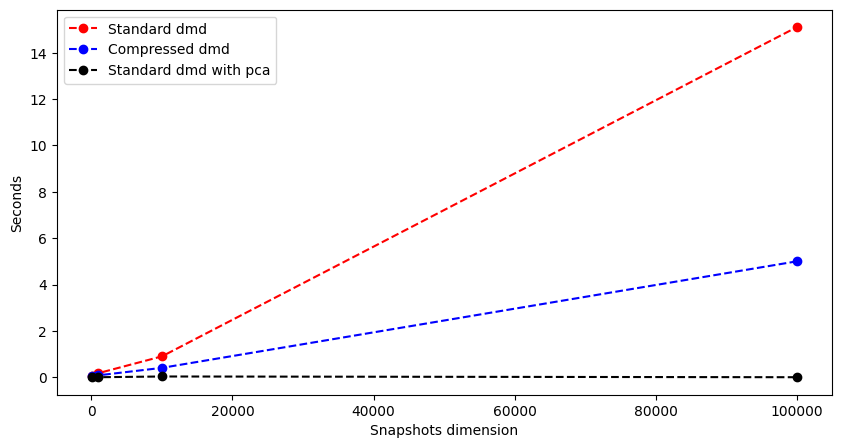

time: 29.7 s (started: 2023-08-24 14:42:02 +00:00)


In [ ]:
time_dmd = []
time_cdmd = []
time_dmdpca = []
dim = []

niter = 4
ndims = 10 ** np.arange(2, 2 + niter)
nsnaps = [100] * niter
for nsnap, ndim in zip(nsnaps, ndims):
    pca = PCA(0.9999999999999999)
    snapshots_matrix = create_dataset(ndim, nsnap)[-1].T
    dim.append(snapshots_matrix.shape[0])
    random_matrix = np.random.permutation(
        snapshots_matrix.shape[0] * snapshots_matrix.shape[1]
    )
    random_matrix = random_matrix.reshape(
        snapshots_matrix.shape[1], snapshots_matrix.shape[0]
    )

    compression_matrix = random_matrix / np.linalg.norm(random_matrix)

    PC = pca.fit_transform(snapshots_matrix.T.real)

    t0 = time.time()
    DMD(svd_rank=-1, exact=True).fit(snapshots_matrix)
    t1 = time.time()
    time_dmd.append(t1 - t0)

    t0 = time.time()
    CDMD(svd_rank=-1, compression_matrix=compression_matrix).fit(
        snapshots_matrix
    )
    t1 = time.time()
    time_cdmd.append(t1 - t0)

    t0 = time.time()
    DMD(svd_rank=-1, exact=True).fit(PC.T)
    t1 = time.time()
    time_dmdpca.append(t1 - t0)

plt.figure(figsize=(10, 5))
plt.plot(dim, time_dmd, "ro--", label="Standard dmd")
plt.plot(dim, time_cdmd, "bo--", label="Compressed dmd")
plt.plot(dim, time_dmdpca, "ko--", label="Standard dmd with pca")
plt.legend()
plt.ylabel("Seconds")
plt.xlabel("Snapshots dimension")
plt.show()

/usr/local/lib/python3.10/dist-packages/pydmd/snapshots.py:72: UserWarning: Input data condition number 1.265381057915959e+34. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pydmd/snapshots.py:72: UserWarning: Input data condition number 1.7922209771547024e+17. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pydmd/snapshots.py:72: UserWarning: Input data condition number 1.1602390123903517e+17. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pydmd/snapshots.py:72: UserWarning: Input data condition number 1.0885419934410566e+17. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


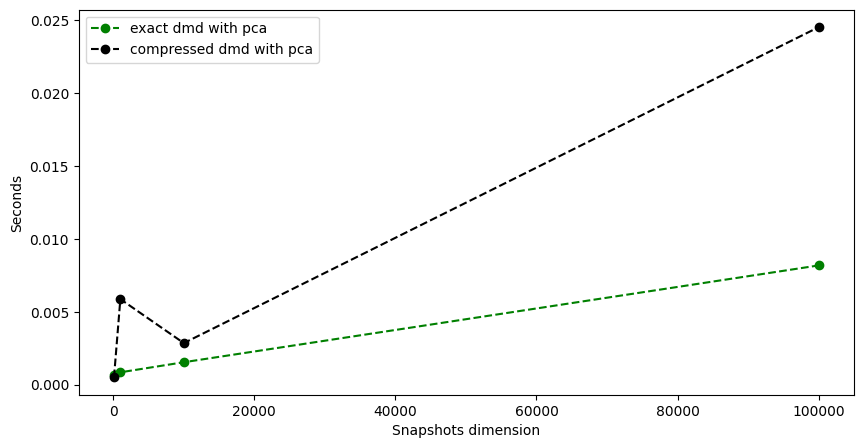

time: 32.7 s (started: 2023-07-19 15:44:34 +00:00)


In [ ]:
time_dmd = []
time_cdmd = []
time_dmdpca = []
time_cdmdpca = []
dim = []

niter = 4
ndims = 10 ** np.arange(2, 2 + niter)
nsnaps = [100] * niter
for nsnap, ndim in zip(nsnaps, ndims):
    pca = PCA(0.99)
    snapshots_matrix = create_dataset(ndim, nsnap)[-1].T
    dim.append(snapshots_matrix.shape[0])
    random_matrix = np.random.permutation(
        snapshots_matrix.shape[0] * snapshots_matrix.shape[1]
    )
    random_matrix = random_matrix.reshape(
        snapshots_matrix.shape[1], snapshots_matrix.shape[0]
    )

    compression_matrix = random_matrix / np.linalg.norm(random_matrix)

    PC = pca.fit_transform(snapshots_matrix.real)

    t0 = time.time()
    DMD(svd_rank=-1, exact=True).fit(snapshots_matrix)
    t1 = time.time()
    time_dmd.append(t1 - t0)

    t0 = time.time()
    CDMD(svd_rank=-1, compression_matrix=compression_matrix).fit(
        snapshots_matrix
    )
    t1 = time.time()
    time_cdmd.append(t1 - t0)

    t0 = time.time()
    DMD(svd_rank=-1, exact=True).fit(PC)
    t1 = time.time()
    time_dmdpca.append(t1 - t0)

    t0 = time.time()
    CDMD(svd_rank=-1, compression_matrix=compression_matrix).fit(
        PC
    )
    t1 = time.time()
    time_cdmdpca.append(t1 - t0)

plt.figure(figsize=(10, 5))
#plt.plot(dim, time_dmd, "ro--", label="exact dmd")
#plt.plot(dim, time_cdmd, "bo--", label="compressed dmd")
plt.plot(dim, time_dmdpca, "go--", label="exact dmd with pca")
plt.plot(dim, time_cdmdpca, "ko--", label="compressed dmd with pca")
plt.legend()
plt.ylabel("Seconds")
plt.xlabel("Snapshots dimension")
plt.show()

<ipython-input-12-625a4df2b553>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pc3 = pc1.T.append(pc2.T)
/usr/local/lib/python3.10/dist-packages/pydmd/snapshots.py:72: UserWarning: Input data condition number 1.265381057915959e+34. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pydmd/snapshots.py:72: UserWarning: Input data condition number 5.451219941581951e+16. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(
<ipython-input-12-625a4df2b553>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pc3 = pc1.T.append(pc2.T)
/usr/local/lib/python3.10/dist-packages/pydmd/snapshots.py:72: UserWarning: Input data condition number 1.7922209771547024e+17. Consider p

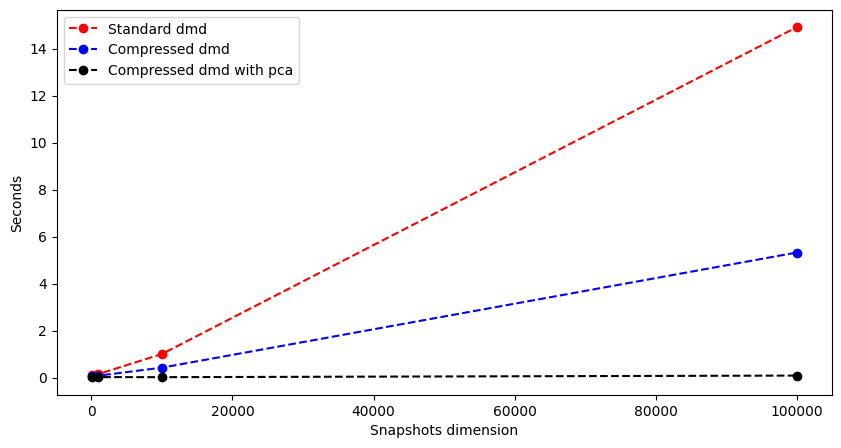

time: 31.4 s (started: 2023-07-20 12:32:42 +00:00)


In [ ]:
time_dmd = []
time_cdmd = []
time_cdmdpca = []
dim = []

niter = 4
ndims = 10 ** np.arange(2, 2 + niter)
nsnaps = [100] * niter
for nsnap, ndim in zip(nsnaps, ndims):
    pca = PCA(0.9999)
    snapshots_matrix = create_dataset(ndim, nsnap)[-1].T
    dim.append(snapshots_matrix.shape[0])
    random_matrix = np.random.permutation(
        snapshots_matrix.shape[0] * snapshots_matrix.shape[1]
    )
    random_matrix = random_matrix.reshape(
        snapshots_matrix.shape[1], snapshots_matrix.shape[0]
    )

    compression_matrix = random_matrix / np.linalg.norm(random_matrix)

    PC1 = pca.fit_transform(snapshots_matrix.real)
    PC2 = pca.fit_transform(snapshots_matrix.imag)
    pc2 = pd.DataFrame(PC2)
    pc1 = pd.DataFrame(PC1)
    pc3 = pc1.T.append(pc2.T)
    PC3 = np.array(pc3)

    t0 = time.time()
    DMD(svd_rank=-1, exact=True).fit(snapshots_matrix)
    t1 = time.time()
    time_dmd.append(t1 - t0)

    t0 = time.time()
    CDMD(svd_rank=-1, compression_matrix=compression_matrix).fit(
        snapshots_matrix
    )
    t1 = time.time()
    time_cdmd.append(t1 - t0)

    t0 = time.time()
    CDMD(svd_rank=-1, compression_matrix=compression_matrix).fit(
        PC3.T
    )
    t1 = time.time()
    time_cdmdpca.append(t1 - t0)

plt.figure(figsize=(10, 5))
plt.plot(dim, time_dmd, "ro--", label="Standard dmd")
plt.plot(dim, time_cdmd, "bo--", label="Compressed dmd")
plt.plot(dim, time_cdmdpca, "ko--", label="Compressed dmd with pca")
plt.legend()
plt.ylabel("Seconds")
plt.xlabel("Snapshots dimension")
plt.show()

In [ ]:
dmd_rec_real = pdmd.reconstructed_data[0:3]
dmd_rec_imag = pdmd.reconstructed_data[3:]

x_recon_real = pca_r.inverse_transform(dmd_rec_real.T)
x_recon_imag = pca_i.inverse_transform(dmd_rec_imag.T)

X_recon = x_recon_real + 1j * x_recon_imag


time: 4.92 ms (started: 2023-09-27 22:35:12 +00:00)


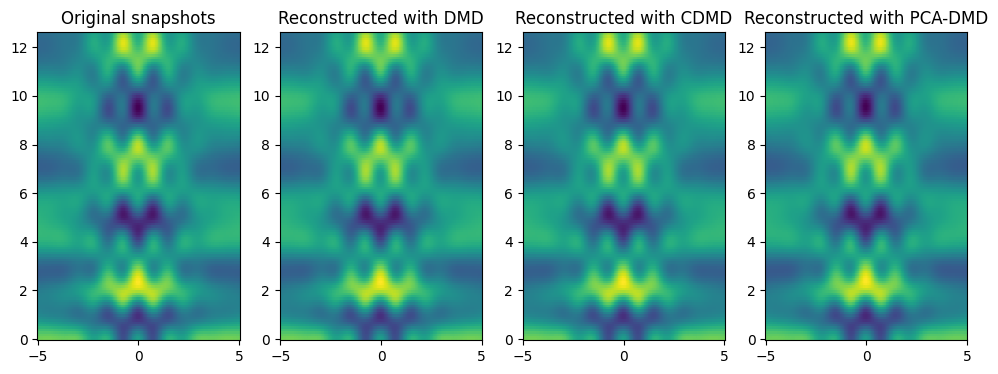

time: 3.74 s (started: 2023-09-27 22:37:01 +00:00)


In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.title("Original snapshots")
plt.pcolor(xgrid, tgrid, X.real)
plt.subplot(1, 4, 2)
plt.title("Reconstructed with DMD")
plt.pcolor(xgrid, tgrid, dmdo.reconstructed_data.real.T)
plt.subplot(1, 4, 3)
plt.title("Reconstructed with CDMD")
plt.pcolor(xgrid, tgrid, cdmd_2.reconstructed_data.real.T)
plt.subplot(1, 4, 4)
plt.title("Reconstructed with PCA-DMD")
plt.pcolor(xgrid, tgrid, X_recon.real)

In [ ]:
diff_dmd = X.real - dmdo.reconstructed_data.real.T
diff_cdmd = X.real - cdmd_2.reconstructed_data.real.T
diff_pcadmd = X.real - X_recon.real

time: 9.99 ms (started: 2023-09-27 22:39:00 +00:00)


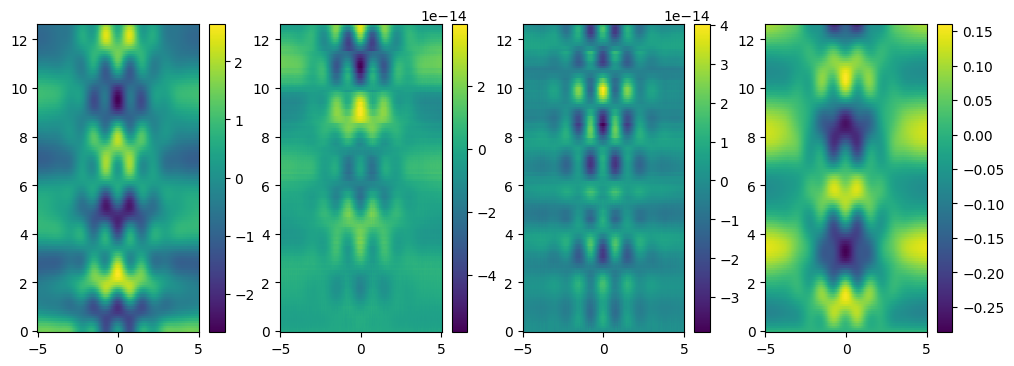

time: 2.97 s (started: 2023-09-27 22:40:39 +00:00)


In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
#plt.title("Original snapshots")
plt.pcolor(xgrid, tgrid, X.real)
fig = plt.colorbar()
plt.subplot(1, 4, 2)
#plt.title("Reconstructed with DMD")
plt.pcolor(xgrid, tgrid, diff_dmd.real)
fig = plt.colorbar()
plt.subplot(1, 4, 3)
#plt.title("Reconstructed with CDMD")
plt.pcolor(xgrid, tgrid, diff_cdmd.real)
fig = plt.colorbar()
plt.subplot(1, 4, 4)
#plt.title("Reconstructed with PCA-DMD")
plt.pcolor(xgrid, tgrid, diff_pcadmd.real)
fig = plt.colorbar()

In [ ]:
import sys

time: 510 µs (started: 2023-08-14 12:23:05 +00:00)


In [ ]:
X_size_bytes = sys.getsizeof(X)

# Convert bytes to megabytes
X_size_kilobytes = X_size_bytes / 1024

print(f"Array size: {X_size_kilobytes:.2f} KB")

Array size: 512.12 KB
time: 2.11 ms (started: 2023-08-14 12:23:13 +00:00)


In [ ]:
PC_size_bytes = sys.getsizeof(PCf)

# Convert bytes to megabytes
PC_size_kilobytes = PC_size_bytes / 1024

print(f"Array size: {PC_size_kilobytes:.2f} KB")

Array size: 6.12 KB
time: 746 µs (started: 2023-08-14 12:23:29 +00:00)


In [ ]:
DMD_size_bytes = sys.getsizeof(pdmd.reconstructed_data)

# Convert bytes to megabytes
DMD_size_kilobytes = DMD_size_bytes / 1024

print(f"Array size: {DMD_size_kilobytes:.2f} KB")

Array size: 12.12 KB
time: 14.5 ms (started: 2023-08-14 12:45:40 +00:00)


In [ ]:
cdmd_2.growth_rate

array([0.9342836 , 0.99173829, 0.97421526])

time: 8.67 ms (started: 2023-08-14 12:45:51 +00:00)
